Zij $X$ de dichtheid van een hokje. De kans $P(X>a)$ met $a\in\mathbb{R}$wordt gegeven door: $P(X>a)=\frac{\#\{X|X>a\}}{\# X}$ Hieronder is deze kansverdeling weergegeven.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [12, 6]

filelist=["1512","2063","2145","2806","2870","2979","2980","3010"]

In [2]:
def findall(string,char):
    arr=np.array([])
    for i in range(len(string)):
        if string[i]==char:
            arr=np.append(arr,[i])
    return arr

In [3]:
def open_file(file):
    lst=np.array(open(file,"r").readlines())
    timearr=np.array([])
    placearr=np.array([])
    chargearr=np.array([])
    for i in range(1,len(lst)):
        if lst[i][19:]!=';;\n':
            fnd=findall(lst[i],";")
            timearr=np.append(timearr,[i])
            placearr=np.append(placearr,[float(lst[i][int((fnd[0]+1)):int(fnd[1])])])
            chargearr=np.append(chargearr,[float(lst[i][int(fnd[1]+1):])])
    return np.vstack((timearr,placearr,chargearr))

In [4]:
def get_box_y(index,boxnumber,maxtime,data):
    return min(boxnumber-1,int(data[0][index]*boxnumber/maxtime))

In [5]:
def get_box_x(index,boxnumber,maxplace,data):
    return min(boxnumber-1,int(data[1][index]*boxnumber/maxplace))

In [6]:
def track_groups(elt,todo,ijlist):
    if elt in ijlist:
        todo+=[elt]
        ijlist.remove(elt)
def group_boxes(grid,condition,sizex,sizey):
    ijlist=[]
    for i in range(sizex):
        for j in range(sizey):
            if grid[i,j]>=condition:
                ijlist+=[[i,j]]
    groups=[]
    groupcount=0
    for ij in ijlist:
        groups+=[[ij]]
        groupstart=True
        todo=[ij]
        ijlist.remove(ij)
        while len(todo)>0:
            for p in todo:
                track_groups([p[0]+1,p[1]],todo,ijlist)
                track_groups([p[0]-1,p[1]],todo,ijlist)
                track_groups([p[0],p[1]+1],todo,ijlist)
                track_groups([p[0],p[1]-1],todo,ijlist)
                if groupstart==True:
                    groupstart=False
                else:
                    groups[groupcount]+=[p] 
                todo.remove(p)
        groupcount+=1
    return np.array(groups)

<IPython.core.display.Javascript object>


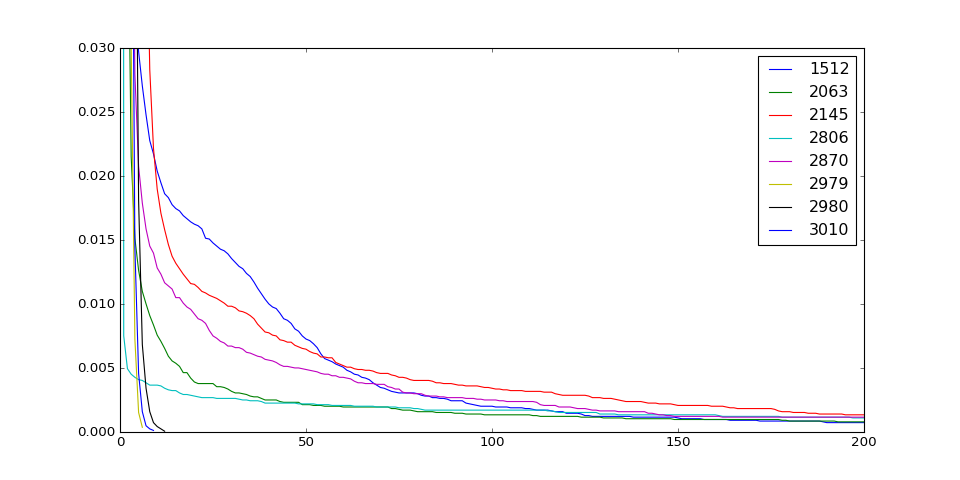

/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [12]:
%matplotlib notebook
def densityplot(file,lb):
    data=open_file(file)
    boxesx=2**8
    boxesy=2**6
    grid=np.zeros((boxesx,boxesy))
    maxplace=max(data[1])
    maxtime=max(data[0])
    datalength=len(data[0])

    #data discretiseren

    for i in range(datalength):
        grid[get_box_x(i,boxesx,maxplace,data)][get_box_y(i,boxesy,maxtime,data)]+=1

    grid=grid.flatten()
    gridlength=len(grid)
    maxdense=max(grid)
    graphrange=np.arange(0,maxdense)
    probabilities=np.zeros(maxdense)
    for i in graphrange:
        probabilities[i]=len(grid[grid>=i])/gridlength
    plt.plot(graphrange,probabilities,label=lb)

filelist=["1512","2063","2145","2806","2870","2979","2980","3010"]
plt.xlim(0,200)
plt.ylim(0,0.03)
for i in filelist:
    densityplot("/home/geelhoed/GitHub/SCG-analyse/data/origineel/"+i+"-pd.csv",i)
plt.legend()
plt.show()

De funchtie $f:\mathbb{R}\to\mathbb{R}$ met $f(x)=P(X>x)$ lijkt dus op een exponentiële functie van de vorm $f(x)=Ae^{Bx}$ waarbij $A$ en $B$ constanten zijn. Nemen we de natuurlijke logaritme, dan krijgen we: $\ln{(f(x))}=Bx+\ln{(A)}$. Er is dus (bij benadering) een lineair verband tussen $\ln{(f(x))}$ en $x$. Gegeven dan een kans $p$ die aangeeft dat een hokje met dichtheid $\rho$ meegeteld wordt als de kans $P(X>\rho)<p$, dan tellen alleen de hokjes met dichtheid $x$ mee waarvoor geldt: $Ae^{Bx}<p\Rightarrow e^{Bx}<\frac{p}{A}\Rightarrow Bx<\ln{(\frac{p}{A})\Rightarrow x>\frac{\ln{(\frac{p}{A})}}{B}}$ want $B<0$. Hieronder zijn de functies "gefit":

<IPython.core.display.Javascript object>


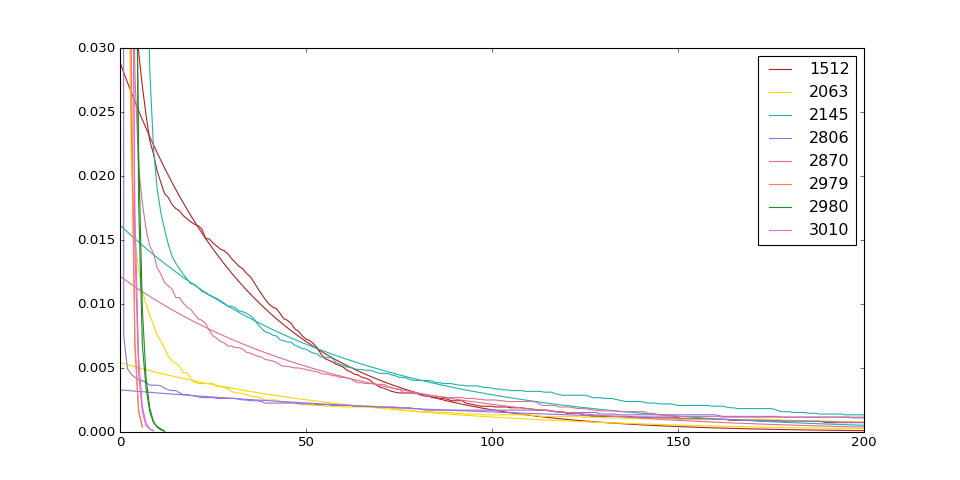

/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [13]:
%matplotlib notebook
def densityplot(file,lb,color):
    data=open_file(file)
    boxesx=2**8
    boxesy=2**6
    grid=np.zeros((boxesx,boxesy))
    maxplace=max(data[1])
    maxtime=max(data[0])
    datalength=len(data[0])

    #data discretiseren

    for i in range(datalength):
        grid[get_box_x(i,boxesx,maxplace,data)][get_box_y(i,boxesy,maxtime,data)]+=1

    grid=grid.flatten()
    gridlength=len(grid)
    maxdense=max(grid)
    graphrange=np.arange(0,maxdense)
    probabilities=np.zeros(maxdense)
    for i in graphrange:
        probabilities[i]=len(grid[grid>=i])/gridlength
    if maxdense<100:
        B,A=np.polyfit(graphrange[0:maxdense],np.log(probabilities)[0:maxdense],1)
    else:
        B,A=np.polyfit(graphrange[10:100],np.log(probabilities)[10:100],1)
    fitfunc=np.exp(B*graphrange+A)
    plt.plot(graphrange,probabilities,label=lb,c=color)
    plt.plot(graphrange,fitfunc,label=None,c=color)

plt.xlim(0,200)
plt.ylim(0,0.03)
colorlist=["firebrick","gold","lightseagreen","mediumpurple","palevioletred","coral","forestgreen","orchid"]
for i in range(len(filelist)):
    densityplot("/home/geelhoed/GitHub/SCG-analyse/data/origineel/"+str(filelist[i])+"-pd.csv",filelist[i],colorlist[i])
plt.legend()
plt.show()

Conclusie: dit werkt niet zo goed, de lijnen zijn niet goed met een exponentiële functie te benaderen.

# DUS: de groote functie die alles samenvoegt:

In [9]:
%matplotlib notebook

def show_clusters(file,probability,use_exp=False):

    boxesx=2**8
    boxesy=2**5
    
    #met data spelen

    data=open_file(file)
    grid=np.zeros((boxesx,boxesy))
    maxplace=max(data[1])
    maxtime=max(data[0])
    maxcharge=max(data[2])
    sstep=maxplace/boxesx
    tstep=maxtime/boxesy
    datalength=len(data[0])

    #gewoon scatterplot

    plt.figure("plaatjen")
    plt.axis([0,maxplace,0,maxtime])
    plt.xlabel("Plaats")
    plt.ylabel("Tijd")
    plt.scatter(data[1],data[0],marker="o",s=1,c="black")

    #data discretiseren

    for i in range(datalength):
        grid[get_box_x(i,boxesx,maxplace,data)][get_box_y(i,boxesy,maxtime,data)]+=1

    flatgrid=grid.flatten()
    maxdense=max(flatgrid)
    
    #kansverdelingen bepalen
    
    gridlength=len(flatgrid)
    graphrange=np.arange(0,maxdense)
    probabilities=np.zeros(maxdense)
    for i in graphrange:
        probabilities[i]=len(flatgrid[flatgrid>=i])/gridlength
    if maxdense<100:
        sensitivity=10000
    else:
        sensitivity=len(probabilities[probabilities>probability])

    #data groeperen

    groups=group_boxes(grid,sensitivity,boxesx,boxesy)

    colorcycle=["red","green","blue","yellow","orange","purple","pink","cyan","steelblue"]
    for i in range(len(groups)):
        for j in range(len(groups[i])):
            plt.gca().add_patch(Rectangle((groups[i][j][0]*sstep,groups[i][j][1]*tstep),sstep,tstep,linewidth=1,edgecolor=colorcycle[i%len(colorcycle)],facecolor=colorcycle[i%len(colorcycle)],alpha=0.5))

    plt.show()

<IPython.core.display.Javascript object>


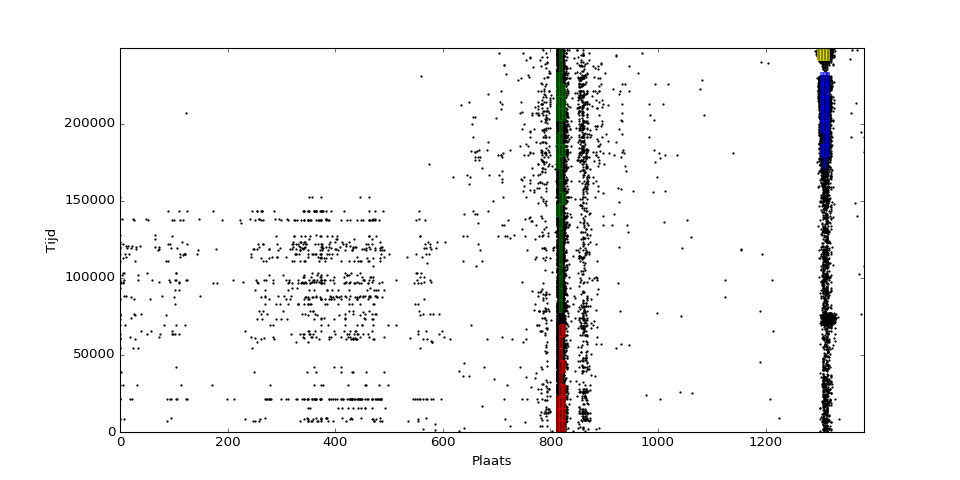

/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [26]:
i=0
show_clusters("/home/geelhoed/GitHub/SCG-analyse/data/origineel/"+filelist[i]+"-pd.csv",0.01)

<IPython.core.display.Javascript object>


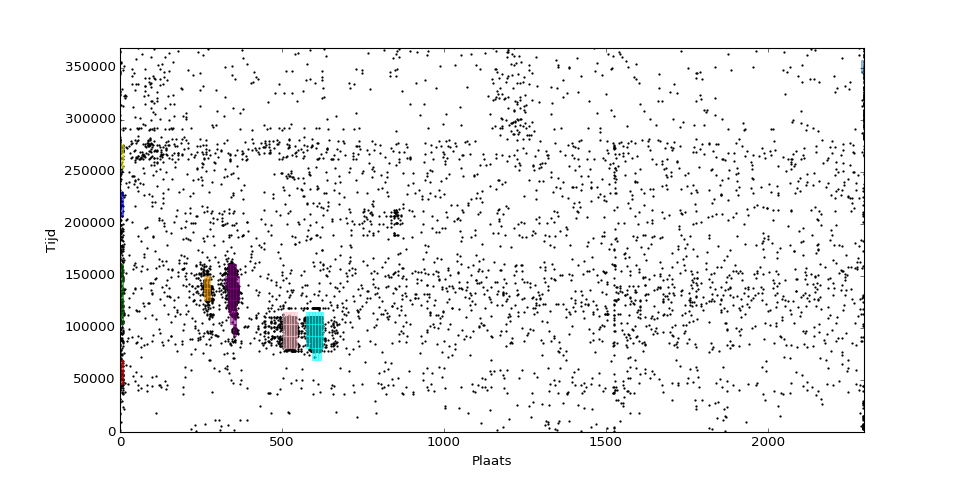

/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [15]:
i=1
show_clusters("/home/geelhoed/GitHub/SCG-analyse/data/origineel/"+filelist[i]+"-pd.csv",0.01)

<IPython.core.display.Javascript object>


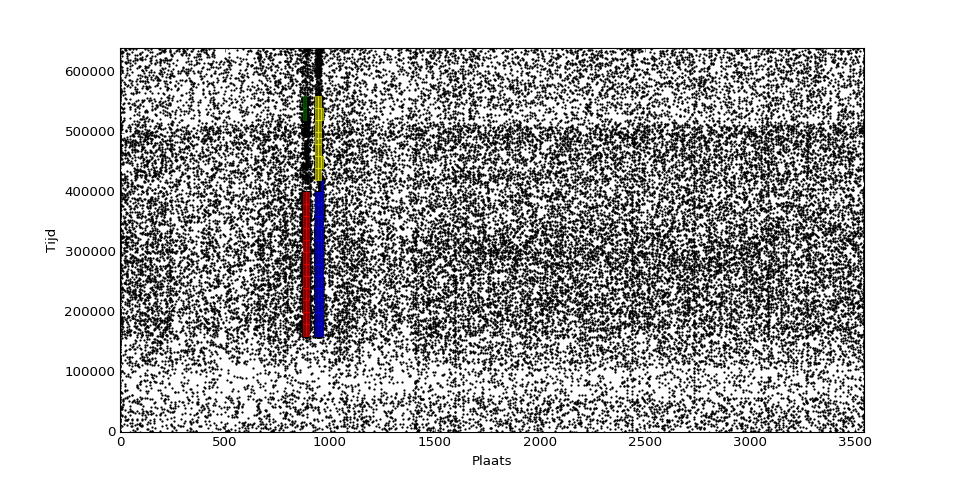

/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [19]:
i=2
show_clusters("/home/geelhoed/GitHub/SCG-analyse/data/origineel/"+filelist[i]+"-pd.csv",0.01)

<IPython.core.display.Javascript object>


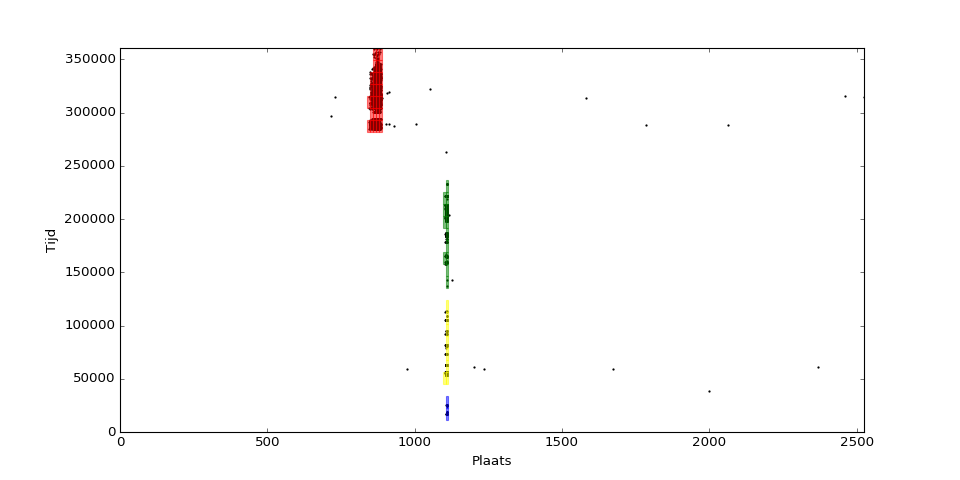

/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [20]:
i=3
show_clusters("/home/geelhoed/GitHub/SCG-analyse/data/origineel/"+filelist[i]+"-pd.csv",0.01)

<IPython.core.display.Javascript object>


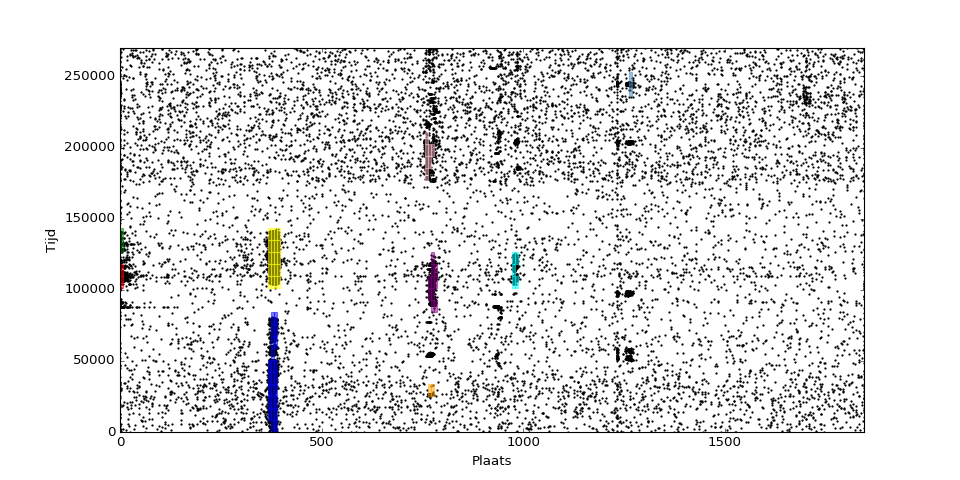

/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [21]:
i=4
show_clusters("/home/geelhoed/GitHub/SCG-analyse/data/origineel/"+filelist[i]+"-pd.csv",0.01)

<IPython.core.display.Javascript object>


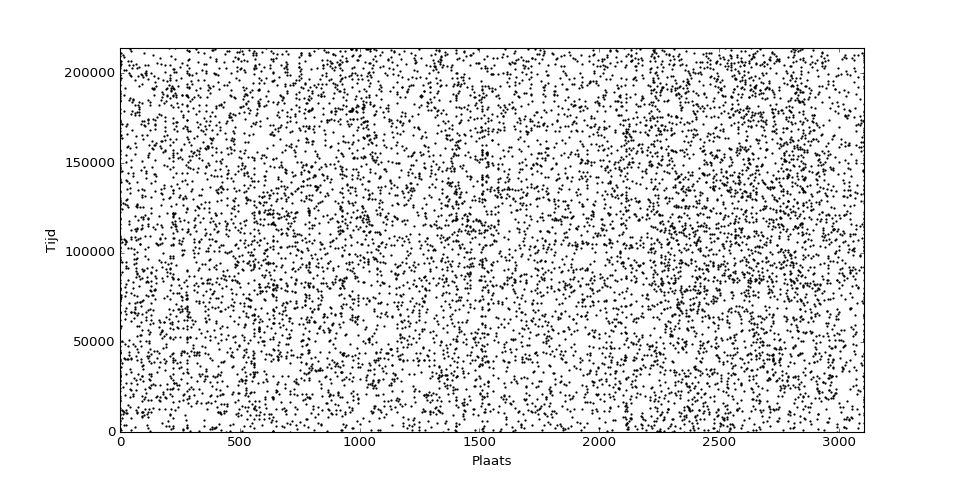

/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [22]:
i=5
show_clusters("/home/geelhoed/GitHub/SCG-analyse/data/origineel/"+filelist[i]+"-pd.csv",0.01)

<IPython.core.display.Javascript object>


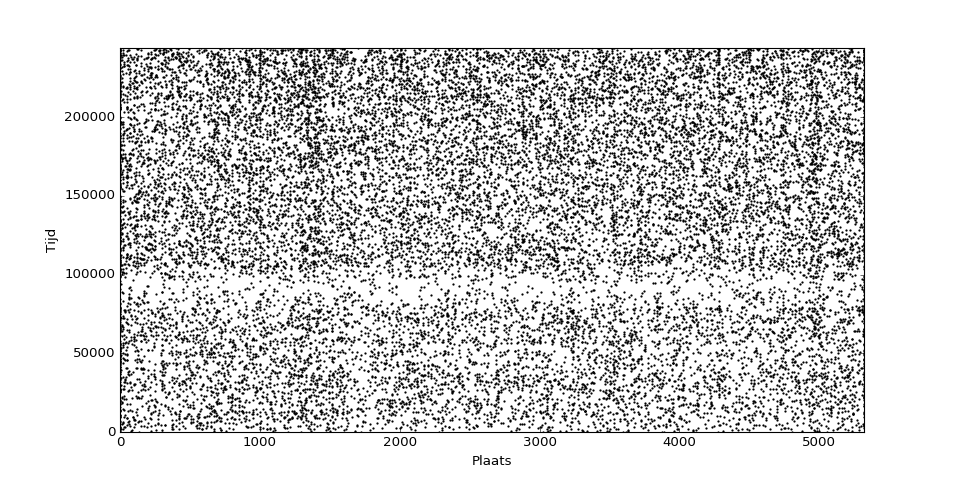

/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [23]:
i=6
show_clusters("/home/geelhoed/GitHub/SCG-analyse/data/origineel/"+filelist[i]+"-pd.csv",0.01)

<IPython.core.display.Javascript object>


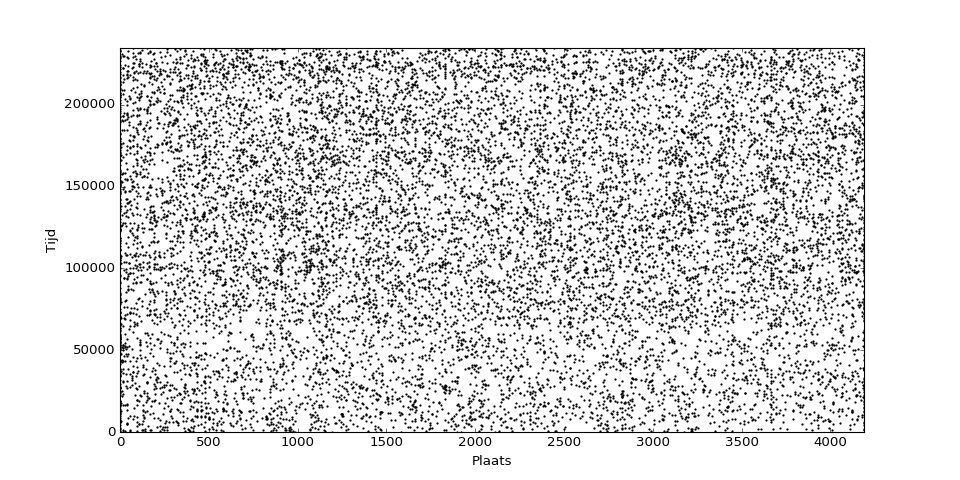

/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/geelhoed/.local/lib/python3.5/site-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [24]:
i=7
show_clusters("/home/geelhoed/GitHub/SCG-analyse/data/origineel/"+filelist[i]+"-pd.csv",0.01)